<a href="https://colab.research.google.com/github/elain-b/LSTM_Climate_Changing_tring/blob/master/LSTM_Climate_Changing_tring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving tokyo-weather-2003-2012.csv to tokyo-weather-2003-2012.csv


In [0]:
print(dataframe.head())

   ice_sales  avg_temp  total_rain  humidity  num_day_over25deg
0        331       9.3       101.0        46                  0
1        268       9.9        53.5        52                  0
2        365      12.7       159.5        49                  0
3        492      19.2       121.0        61                  3
4        632      22.4       172.5        65                  7


Using TensorFlow backend.


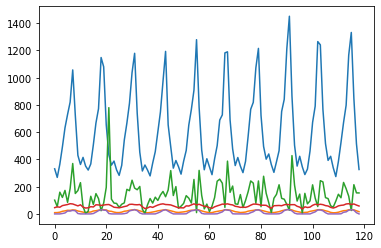

   ice_sales  avg_temp  total_rain  humidity  num_day_over25deg
0        331       9.3       101.0        46                  0
1        268       9.9        53.5        52                  0
2        365      12.7       159.5        49                  0
3        492      19.2       121.0        61                  3
4        632      22.4       172.5        65                  7


In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#データ読み込み　Yは最初の列に配置する
dataframe = pandas.read_csv('./tokyo-weather-2003-2012.csv', usecols=[0,3,4,5,6], engine='python', skipfooter=1)
plt.plot(dataframe)
plt.show()
print(dataframe.head())

In [0]:
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

79 40


In [0]:
# convert an array of values into a dataset matrix
# if you give look_back 3, a part of the array will be like this: Jan, Feb, Mar
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        xset = []
        for j in range(dataset.shape[1]):
            a = dataset[i:(i+look_back), j]
            xset.append(a)
        dataY.append(dataset[i + look_back, 0])      
        dataX.append(xset)
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(testX.shape)
print(testX[0])
print(testY)

# reshape input to be [samples, time steps(number of variables), features] *convert time series into column
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


(27, 5, 12)
[[0.8005072  0.3846154  0.19188505 0.11327136 0.14539307 0.07945901
  0.03127643 0.0972105  0.16568047 0.40912935 0.4843618  0.79712594]
 [0.86507934 0.72222215 0.55555546 0.34523803 0.16269836 0.10714284
  0.06349203 0.19444442 0.32936507 0.5833333  0.76190466 0.92460316]
 [0.30714747 0.06374758 0.3515776  0.19059885 0.10173857 0.00708307
  0.14359304 0.18029621 0.27108824 0.14230523 0.13457824 0.0856407 ]
 [0.8461539  0.71794873 0.71794873 0.69230765 0.38461536 0.12820512
  0.61538464 0.6410256  0.6666667  0.61538464 0.79487187 0.8717949 ]
 [0.9677419  0.6774193  0.16129032 0.03225806 0.         0.
  0.         0.         0.03225806 0.2580645  0.7741935  1.        ]]
[1.         0.50380385 0.19949281 0.07016063 0.13102284 0.06593406
 0.01775149 0.05156383 0.16398987 0.34150466 0.44209638 0.8427726
 0.8224852  0.421809   0.20963651 0.10566357 0.13102284 0.0600169
 0.00507186 0.09890109 0.21639898 0.34065935 0.4480135  0.7582418
 0.8994082  0.49112424 0.20879123]


In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(testX.shape[1], look_back)))	#shape：変数数、遡る時間数
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1000





 - 1s - loss: 0.1406
Epoch 2/1000
 - 0s - loss: 0.0610
Epoch 3/1000
 - 0s - loss: 0.0399
Epoch 4/1000
 - 0s - loss: 0.0274
Epoch 5/1000
 - 0s - loss: 0.0192
Epoch 6/1000
 - 0s - loss: 0.0141
Epoch 7/1000
 - 0s - loss: 0.0104
Epoch 8/1000
 - 0s - loss: 0.0083
Epoch 9/1000
 - 0s - loss: 0.0070
Epoch 10/1000
 - 0s - loss: 0.0066
Epoch 11/1000
 - 0s - loss: 0.0058
Epoch 12/1000
 - 0s - loss: 0.0055
Epoch 13/1000
 - 0s - loss: 0.0052
Epoch 14/1000
 - 0s - loss: 0.0052
Epoch 15/1000
 - 0s - loss: 0.0051
Epoch 16/1000
 - 0s - loss: 0.0048
Epoch 17/1000
 - 0s - loss: 0.0046
Epoch 18/1000
 - 0s - loss: 0.0045
Epoch 19/1000
 - 0s - loss: 0.0043
Epoch 20/1000
 - 0s - loss: 0.0042
Epoch 21/1000
 - 0s - loss: 0.0041
Epoch 22/1000
 - 0s - loss: 0.0037
Epoch 23/1000
 - 0s - loss: 0.0039
Epoch 24/1000
 - 0s - loss: 0.0036
Epoch 25/1000
 - 0s - loss: 0.0036
Epoch 26/1000
 - 0s - loss: 

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
pad_col = numpy.zeros(dataset.shape[1]-1)

# invert predictions
def pad_array(val):
    return numpy.array([numpy.insert(pad_col, 0, x) for x in val])
    
trainPredict = scaler.inverse_transform(pad_array(trainPredict))
trainY = scaler.inverse_transform(pad_array(trainY))
testPredict = scaler.inverse_transform(pad_array(testPredict))
testY = scaler.inverse_transform(pad_array(testY))

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.15 RMSE
Test Score: 102.93 RMSE


[1451.00000179  863.99995152  503.99999229  351.00001666  423.00001556
  345.99998981  289.00000096  329.00000427  462.0000135   672.00001322
  791.00001777 1264.99998995 1241.00000207  767.00002989  515.99998623
  392.99999546  423.00001556  338.99998747  274.00000854  384.99998774
  523.99999394  671.00000785  797.99998485 1165.00001694 1331.99992673
  848.99997673  515.00001611]
[1186.98151986  692.62972493  504.81821696  372.48908815  375.07316987
  336.09087933  292.6255669   389.67898975  530.20807269  627.90194109
  731.53097039  950.78274735 1176.79947391  618.40657913  498.98231973
  366.29677771  374.67909428  354.55568729  292.75173984  384.21932849
  446.70587903  676.92321693  718.54045498 1158.1259143  1246.17285456
  722.98339945  438.66351106]


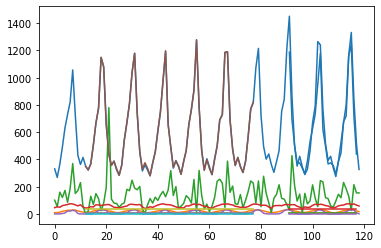

In [0]:
print(testY[:,0])
print(testPredict[:,0])
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()